In [1]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gmt = ceo.GMT_MX()
src = ceo.Source("R",rays_box_size=25.5,rays_box_sampling=501,rays_origin=[0,0,25])
src>>(gmt,)

OPTICAL PATH: ['GMT_MX']


# Vignetting

In [3]:
+src
a0  = src.amplitude.host().sum()

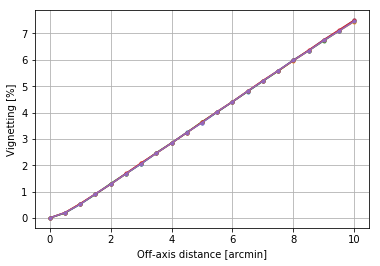

In [4]:
z_ = np.linspace(0,10,21)
o_ = [0,30,45,60,90]
for o in o_:
    v = []
    for z in z_:
        src.updateDirections(ceo.constants.ARCMIN2RAD*z,o*np.pi/180)
        +src
        a = src.amplitude.host().sum()
        v += [100*(a0-a)/a0]

    plt.plot(z_,v,'.-')
plt.grid()
plt.xlabel('Off-axis distance [arcmin]')
plt.ylabel('Vignetting [%]')

# Strehl ratio

In [5]:
q = 2.*np.pi/src.wavelength

In [6]:
src.updateDirections(0,0)
+src
sr0 = np.abs(np.sum(src.wavefront.amplitude.host()*np.exp(1j*q*src.wavefront.phase.host())))**2
print sr0

19865233158.5


In [7]:
src.updateDirections(ceo.constants.ARCMIN2RAD*1.5,0)
+src
sr = np.abs(np.sum(src.wavefront.amplitude.host()*np.exp(1j*q*src.wavefront.phase.host())))**2
print sr/sr0

0.250335629062


In [17]:
from numpy.random import rand
N_SAMPLE = 101
zen = np.linspace(0,3,N_SAMPLE)
strehlRatio = np.zeros(N_SAMPLE)
for k_SAMPLE in range(N_SAMPLE):
    src.updateDirections(zen[k_SAMPLE]*ceo.constants.ARCMIN2RAD,0)
    +src
    sr = np.abs(np.sum(src.wavefront.amplitude.host()*\
                       np.exp(1j*q*src.wavefront.phase.host())))**2
    strehlRatio[k_SAMPLE] = sr/sr0

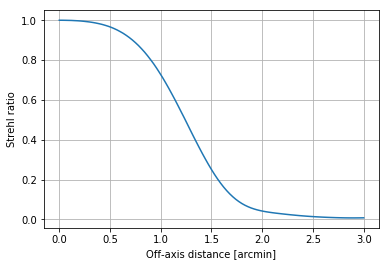

In [18]:
plt.plot(zen,strehlRatio)
plt.grid()
plt.xlabel('Off-axis distance [arcmin]')
plt.ylabel('Strehl ratio')

In [19]:
%%time 
from numpy.random import rand
N_SAMPLE = 1000
zen = np.zeros(N_SAMPLE)
azi = np.zeros(N_SAMPLE)
strehlRatio = np.zeros(N_SAMPLE)
for k_SAMPLE in range(N_SAMPLE):
    zen[k_SAMPLE] = ceo.constants.ARCMIN2RAD*1.5*np.sqrt(rand())
    azi[k_SAMPLE] = rand()*2*np.pi
    src.updateDirections(zen[k_SAMPLE],azi[k_SAMPLE])
    +src
    sr = np.abs(np.sum(src.wavefront.amplitude.host()*\
                       np.exp(1j*q*src.wavefront.phase.host())))**2
    strehlRatio[k_SAMPLE] = sr/sr0

CPU times: user 42.5 s, sys: 19.2 s, total: 1min 1s
Wall time: 1min 1s


In [20]:
import matplotlib.tri as tri
xx = zen*ceo.constants.RAD2ARCMIN*np.cos(azi)
yy = zen*ceo.constants.RAD2ARCMIN*np.sin(azi)
triang = tri.Triangulation(xx, yy)

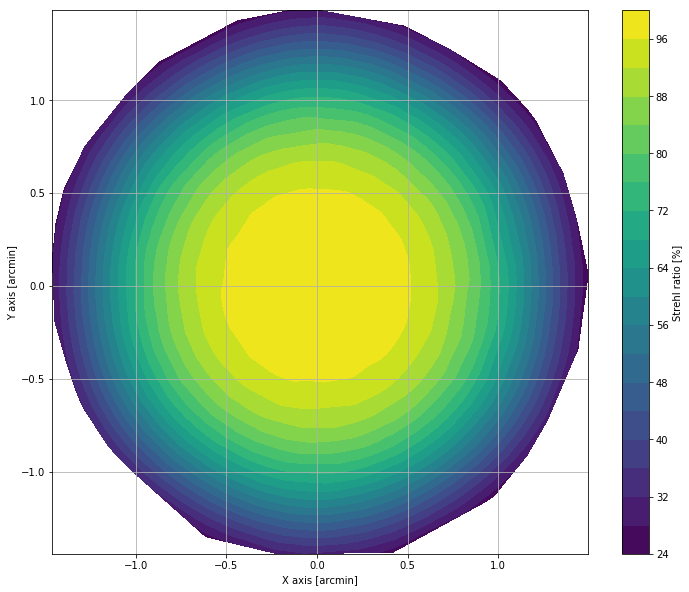

In [21]:
fig = plt.figure()
fig.set_size_inches(12,10)
ax = fig.gca()
h = ax.tricontourf(triang,100*strehlRatio,21,cmap='viridis',shading='gouraud')
plt.colorbar(h,ax=ax,label='Strehl ratio [%]')
plt.grid()
plt.xlabel('X axis [arcmin]')
plt.ylabel('Y axis [arcmin]')

# Pupil distorsion

In [22]:
gmt = ceo.GMT_MX()
src = ceo.Source("R",rays_box_size=25.5,rays_box_sampling=41,rays_origin=[0,0,25])
src>>(gmt,)

OPTICAL PATH: ['GMT_MX']


In [23]:
src.updateDirections(0,0)
+src
V0 = src.rays.vignetting.host().flatten()
xyz0 = src.rays.coordinates.host()

In [24]:
src.updateDirections(ceo.constants.ARCMIN2RAD*5,np.pi/4)
+src
V = src.rays.vignetting.host().flatten()
M = V0*V>0
xyz = src.rays.coordinates.host()

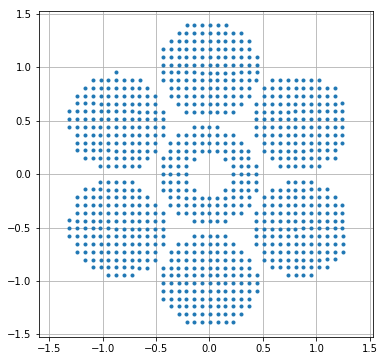

In [25]:
plt.figure(figsize=(6,6))
plt.plot(xyz[M,0],xyz[M,1],'.')
plt.axis('equal')
plt.grid()

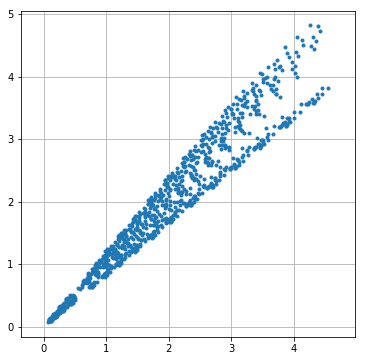

In [26]:
plt.figure(figsize=(6,6))
plt.plot(1e3*(xyz[M,0]-xyz0[M,0]),1e3*(xyz[M,1]-xyz0[M,1]),'.')
plt.axis('equal')
plt.grid()

(-1.4384290956794754,
 1.3733144499760468,
 17.878609053541172,
 17.947137655502086)

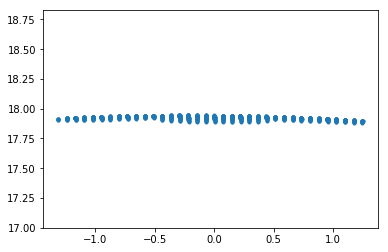

In [29]:
plt.plot(xyz[M,0],xyz[M,2],'.')
plt.axis('equal')

(-1.5222354625538763,
 1.5296331533951495,
 17.878609053541172,
 17.947137655502086)

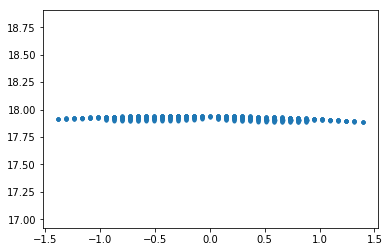

In [30]:
plt.plot(xyz[M,1],xyz[M,2],'.')
plt.axis('equal')